**Specifying Data Analysis Question**

The challenge is to predict the estimated time of arrival for orders- from pick-up to drop-off.

 **Background**
 
Logistics in Sub-Saharan Africa increases the cost of manufactured goods by up to
320%; while in Europe, it only accounts for up to 90% of the manufacturing cost. Sendy
is a business-to-business platform established in 2014, to enable businesses of all types
and sizes to transport goods more efficiently across East Africa. The company is
headquartered in Kenya with a team of more than 100 staff, focused on building practical
solutions for Africa’s dynamic transportation needs, from developing apps and web
solutions to providing dedicated support for goods on the move.


**Problem Statement**

Sendy has hired you to help predict the estimated time of delivery of orders, from the
point of driver pickup to the point of arrival at the final destination. Build a model that
predicts an accurate delivery time, from picking up a package arriving at the final
destination. An accurate arrival time prediction will help all business to improve their
logistics and communicate the accurate time their time to their customers. You will be
required to perform various feature engineering techniques while preparing your data for
further analysis.
You will be required to go through the following:

● Defining the Research Question

● Data Importation

● Data Exploration

● Data Cleaning

● Data Analysis (Univariate and Bivariate)

● Data Preparation

● Data Modeling

● Model Evaluation

● Challenging your Solution

● Recommendations / Conclusion

# **Data Importation and Exploration**

In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load dataset 
df = pd.read_csv('https://bit.ly/3deaKEM')
df.sample(3)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
3173,Order_No_27041,User_Id_246,Bike,3,Business,25,2,5:47:00 PM,25,2,...,6:02:02 PM,3,24.0,NaN,-1.258414,36.804800,-1.255189,36.782203,Rider_Id_875,352
2992,Order_No_14228,User_Id_2112,Bike,3,Business,7,4,1:31:44 PM,7,4,...,1:59:24 PM,5,31.0,NaN,-1.228584,36.882647,-1.215601,36.891686,Rider_Id_633,3
11278,Order_No_24368,User_Id_2423,Bike,3,Business,14,5,2:40:10 PM,14,5,...,3:49:05 PM,8,27.3,NaN,-1.255189,36.782203,-1.303301,36.817086,Rider_Id_795,3033


In [ ]:
#size of dataset
df.shape

(21201, 29)

In [ ]:
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

Most of the variables are numerical types except Rider ID, Arrival at Destination-Time, Pickup-Time, Confirmation - Time, Placement - Time, Personal or Business, Order No, User Id,Vehicle Type

# **Data Cleaning**

In [3]:
#drop some columns
df = df.drop(['Rider Id', 'Order No', 'User Id', 'Placement - Time', 'Confirmation - Time','Pickup - Time', 'Arrival at Pickup - Time', 'Arrival at Destination - Time'], axis=1)

In [5]:
df['Vehicle Type'].unique()
#all values are Bike. Therefore we can drop this column as it doesn't add any information to our dataset.

df = df.drop(['Vehicle Type'], axis=1)

In [4]:
#find missing values
df.isnull().sum()

Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Distance (KM)                                    0
Temperature                                   4366
Precipitation in millimeters                 20649
Pickup Lat                                       0
Pickup Long                                      0
Destination Lat                                  0
Destination Long               

Majority of the records in precipitation in millimeters are missing so I'll drop the column. Then do a median imputation for the missing values in temperature values.

In [6]:
#dropping
df = df.drop('Precipitation in millimeters', axis=1)

#filling missing values with the mean
df['Temperature'].fillna(df['Temperature'].median(), inplace=True)
df.sample(5)
df.isnull().sum()

Platform Type                                0
Personal or Business                         0
Placement - Day of Month                     0
Placement - Weekday (Mo = 1)                 0
Confirmation - Day of Month                  0
Confirmation - Weekday (Mo = 1)              0
Arrival at Pickup - Day of Month             0
Arrival at Pickup - Weekday (Mo = 1)         0
Pickup - Day of Month                        0
Pickup - Weekday (Mo = 1)                    0
Arrival at Destination - Day of Month        0
Arrival at Destination - Weekday (Mo = 1)    0
Distance (KM)                                0
Temperature                                  0
Pickup Lat                                   0
Pickup Long                                  0
Destination Lat                              0
Destination Long                             0
Time from Pickup to Arrival                  0
dtype: int64

In [7]:
#feature encoding
df['Personal or Business'] = df['Personal or Business'].replace({"Business" : "0", "Personal" :"1"})
df.head()


,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
0,3,0,9,5,9,5,9,5,9,5,9,5,4,20.4,-1.317755,36.830370,-1.300406,36.829741,745
1,3,1,12,5,12,5,12,5,12,5,12,5,16,26.4,-1.351453,36.899315,-1.295004,36.814358,1993
2,3,0,30,2,30,2,30,2,30,2,30,2,3,23.5,-1.308284,36.843419,-1.300921,36.828195,455
3,3,0,15,5,15,5,15,5,15,5,15,5,9,19.2,-1.281301,36.832396,-1.257147,36.795063,1341
4,1,1,13,1,13,1,13,1,13,1,13,1,9,15.4,-1.266597,36.792118,-1.295041,36.809817,1214


In [8]:
#find duplicated values
df.duplicated().sum()

2

In [9]:
#drop duplicate values
df = df.drop_duplicates()
df.duplicated().sum()

0

# **Data Analysis**

# Univariate Analysis

In [ ]:
#summary statistics
df.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


3    18054
1     2147
2      980
4       20
Name: Platform Type, dtype: int64


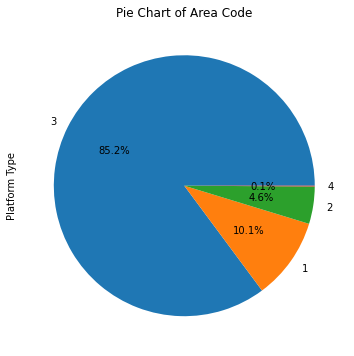

In [ ]:
print(df['Platform Type'].value_counts())

plt.figure(figsize = (6, 6))
df['Platform Type'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Pie Chart of Area Code')
plt.show()

Majority of the orders are generated from platform type 3, followed by platform type 1, 2, 4.

Business    17384
Personal     3817
Name: Personal or Business, dtype: int64


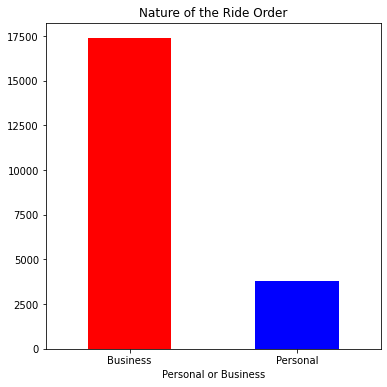

In [ ]:
print(df['Personal or Business'].value_counts())

plt.figure(figsize = (6, 6))
df['Personal or Business'].value_counts().plot(kind = 'bar', rot = 0, color = ['red', 'blue'])
plt.title('Nature of the Ride Order')
plt.xlabel('Personal or Business')
plt.show()

Most of the orders are business orders.

4    4228
5    3993
2    3959
3    3823
1    3789
6    1223
7     186
Name: Placement - Weekday (Mo = 1), dtype: int64


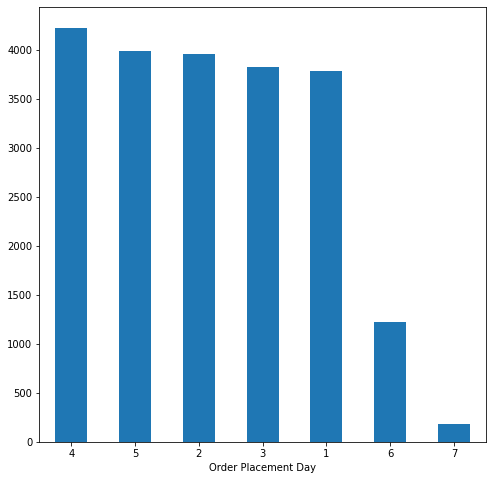

In [ ]:
print(df['Placement - Weekday (Mo = 1)'].value_counts())

plt.figure(figsize = (8, 8))
df['Placement - Weekday (Mo = 1)'].value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel("Order Placement Day")
plt.show()

The most orders are placed on Thursday(4) while the least are placed on Sunday(7).


# **Data Modelling**

In [10]:
#split data into features and target
X = df.drop(['Time from Pickup to Arrival'], axis=1)
y = df['Time from Pickup to Arrival']

In [11]:
#split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  


svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 829.3352280241309
KNN RMSE: 864.159980419419
Decision Tree RMSE: 1126.2947715711698


# **Feature Improvement**

In [ ]:
# Performing normalisation 
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X_train) 
X_train = norm.transform(X_train) 
X_test = norm.transform(X_test)

# Fitting in our models  
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 860.8931648080629
KNN RMSE: 880.6893632852469
Decision Tree RMSE: 1124.4177483559301


The normalization only improved the Decision tree RMSE.

In [ ]:
X = df.drop(['Time from Pickup to Arrival'], axis=1)
y = df['Time from Pickup to Arrival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Performing standardization 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fitting in our models  
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 837.3413906238648
KNN RMSE: 855.2542610263766
Decision Tree RMSE: 1141.9432859278438


Normalization and standardization did not improve our models.

# Feature Selection- Pearson's Correlation

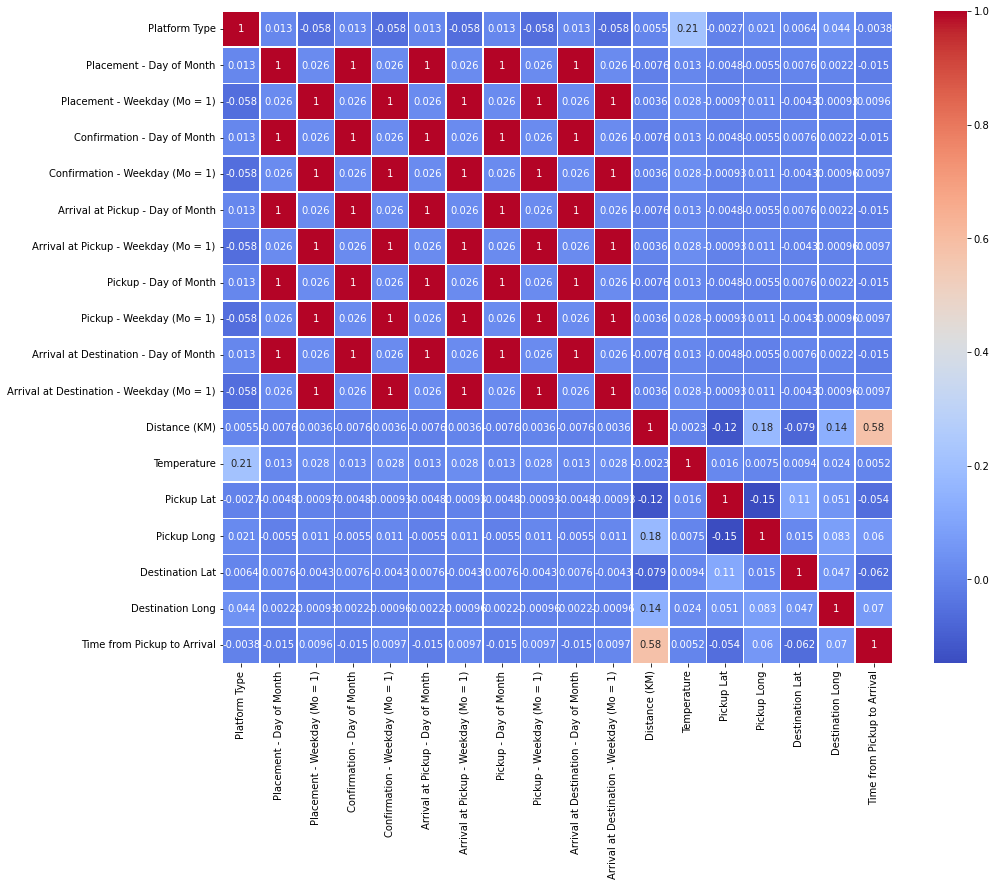

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(15,12))

# We then plot our heatmap visualistion
# 
import seaborn as sns
sns.heatmap(df_corr, annot=True, linewidth=0.5, cmap='coolwarm');

In [13]:
#Removing the values with least correlation to the target variable-Time from Pickup to Arrival.
#In this case, I'll remove the variables with negative correlation to the target.

df2 = df.drop(["Placement - Day of Month", "Confirmation - Day of Month", "Arrival at Pickup - Day of Month", "Pickup - Day of Month", "Arrival at Destination - Day of Month", "Pickup Lat", "Destination Lat"], axis=1)

In [16]:
X = df2.drop(['Time from Pickup to Arrival'], axis=1)
y = df2['Time from Pickup to Arrival']

#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#creating instance of our models
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

#train the models
svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model 
from sklearn import metrics 
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 823.5480211679591
KNN RMSE: 863.7151430839064
Decision Tree RMSE: 1118.8913713051318


Pearson correlation coefficient improved the model's performance.

# **Wrapper Method- Recursive Feature Elimination**

In [20]:
# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)
 
# Fitting in our models   

svm_regressor = SVR(kernel="linear")  
#svm_regressor = SVR(kernel='rbf', C=10) 
dec_regressor = DecisionTreeRegressor(random_state=27)

# We want to select the best 2 features for our model. 
# NB: n_features_to_select will include the response variable
# ---
#  
from sklearn.feature_selection import RFE
svm_regressor = RFE(svm_regressor, n_features_to_select = 3, step=1)
dec_regressor = RFE(dec_regressor, n_features_to_select = 3, step=1)

svm_regressor.fit(X_train, y_train) 
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test) 
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluate our model  
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred))) 
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))
 
# Displaying our best features
print('SVM Selected features: %s' % list(X.columns[svm_regressor.support_]))
print('Decision Tree Selected features: %s' % list(X.columns[dec_regressor.support_]))

SVM RMSE: 812.4495731472573
Decision Tree RMSE: 1107.9319484067819
SVM Selected features: ['Personal or Business', 'Distance (KM)', 'Pickup Long']
Decision Tree Selected features: ['Distance (KM)', 'Temperature', 'Destination Long']


# Feature Transformation: Principal Component Analysis

In [19]:
# Splitting our dataset  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 0)

from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Fitting in our models   
svm_regressor = SVR(kernel='rbf', C=10)
knn_regressor = KNeighborsRegressor()
dec_regressor = DecisionTreeRegressor(random_state=27)

svm_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
dec_regressor.fit(X_train, y_train)

# Making Predictions  
svm_y_pred = svm_regressor.predict(X_test)
knn_y_pred = knn_regressor.predict(X_test)
dec_y_pred = dec_regressor.predict(X_test)

# Finally, evaluating our models  
print('SVM RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm_y_pred)))
print('KNN RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))
print('Decision Tree RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dec_y_pred)))

SVM RMSE: 825.6431116205372
KNN RMSE: 864.5864076899799
Decision Tree RMSE: 1119.5637223783979


# **Summary of Findings**

- The Recursive function elimination method led to the best improvement in the RMSE of the models.
- Normalization and standardization did not improve the models performance.

# **Next Steps**
- Other measures such as hyperparameter tuning could possibly assist improve model performance.
